# **EDUARDO PEREZ CHAVARRIA. FT17**
## Proyecto individual
### EDA

## **0. Preliminares**

### **Carga de librerías basicas**

In [409]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import re
from math import sqrt, isnan


### **Carga de DFs**

In [410]:
ruta_archivo_parquet = "bases/steam_games_curado.parquet"
# Importar el archivo Parquet como un DataFrame
df_juegos = pd.read_parquet(ruta_archivo_parquet)


ruta_archivo_parquet = "bases/user_items_curado.parquet"
# Importar el archivo Parquet como un DataFrame
df_usit = pd.read_parquet(ruta_archivo_parquet)

# Importar el archivo CSV como DataFrame
df_users_review_curado_sentiments = pd.read_parquet("bases/users_review_curado_sentiments.parquet", engine='pyarrow')




### **Primeros cambios**
Diferenciar years

In [411]:
df_juegos.rename(columns={'year': 'year_release'}, inplace=True)

df_users_review_curado_sentiments.rename(columns={'year': 'year_review'}, inplace=True)



### **Datos generales**

In [412]:
print("\nInformación para df_juegos:")
print(df_juegos.info())

print("\nInformación para df_users_review_curado_sentiments:")
print(df_users_review_curado_sentiments.info())

print("\nInformación para df_usit:")
print(df_usit.info())


Información para df_juegos:
<class 'pandas.core.frame.DataFrame'>
Index: 74835 entries, 0 to 32134
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   item_id       74835 non-null  object 
 1   publisher     74835 non-null  object 
 2   genres        74835 non-null  object 
 3   app_name      74835 non-null  object 
 4   price         74835 non-null  float64
 5   early_access  74835 non-null  bool   
 6   developer     74835 non-null  object 
 7   year_release  74835 non-null  object 
dtypes: bool(1), float64(1), object(6)
memory usage: 4.6+ MB
None

Información para df_users_review_curado_sentiments:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58400 entries, 0 to 58399
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          58400 non-null  object
 1   item_id          58400 non-null  int64 
 2   recommend        58400 non

## **1. EDA steam games: df_juegos**

### **1.1. Info general**

In [413]:
print(df_juegos.info())
print(df_juegos.head())

<class 'pandas.core.frame.DataFrame'>
Index: 74835 entries, 0 to 32134
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   item_id       74835 non-null  object 
 1   publisher     74835 non-null  object 
 2   genres        74835 non-null  object 
 3   app_name      74835 non-null  object 
 4   price         74835 non-null  float64
 5   early_access  74835 non-null  bool   
 6   developer     74835 non-null  object 
 7   year_release  74835 non-null  object 
dtypes: bool(1), float64(1), object(6)
memory usage: 4.6+ MB
None
  item_id  publisher      genres             app_name  price  early_access  \
0  761140  Kotoshiro      Action  Lost Summoner Kitty  4.990         False   
0  761140  Kotoshiro      Casual  Lost Summoner Kitty  4.990         False   
0  761140  Kotoshiro       Indie  Lost Summoner Kitty  4.990         False   
0  761140  Kotoshiro  Simulation  Lost Summoner Kitty  4.990         False   
0  761140  

### **1.2. Nube de palabras para "app_name", "genres", "developer"**

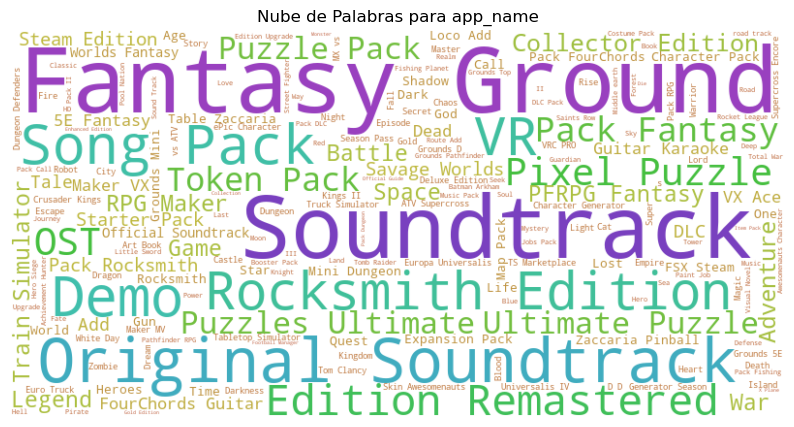

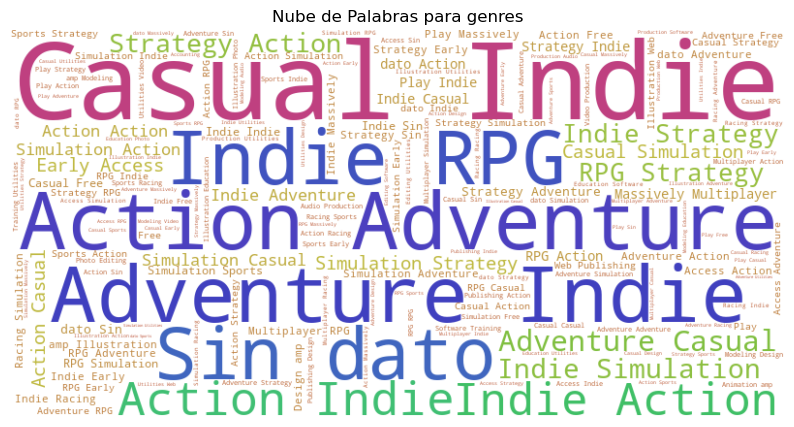

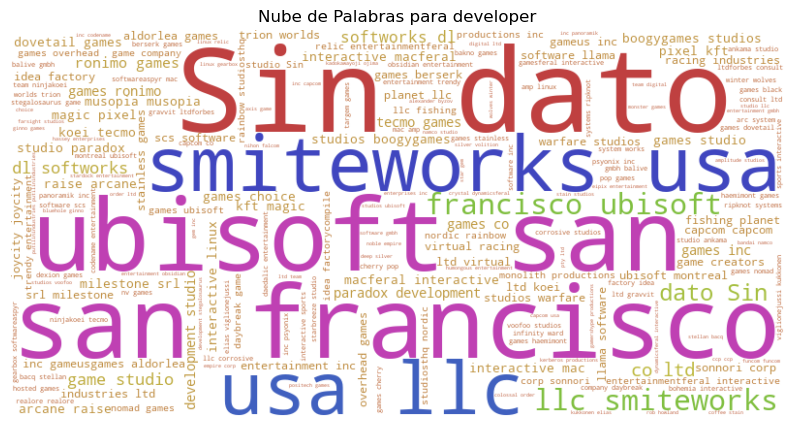

In [414]:
# Función personalizada para asignar colores
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return f"hsl({int(360 * font_size / 120)}, 50%, 50%)"

# Crear un mapa de colores personalizado
custom_cmap = LinearSegmentedColormap.from_list("custom", ["#00ff00", "#ff0000"])

# Definir las columnas para las que quieres generar las nubes de palabras
columnas = ["app_name", "genres", "developer"]

# Generar la nube de palabras para cada columna
for columna in columnas:
    # Filtrar valores no nulos en la columna
    valores_no_nulos = df_juegos[columna].dropna()

    # Verificar si hay palabras disponibles
    if not valores_no_nulos.empty:
        # Generar la nube de palabras con colores personalizados
        wordcloud = WordCloud(
            width=800,
            height=400,
            max_font_size=120,
            background_color="white",
            colormap=custom_cmap,
            color_func=color_func,
            contour_width=1,
            contour_color="black",
            random_state=42
        ).generate(" ".join(valores_no_nulos.astype(str)))

        # Mostrar la nube de palabras
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Nube de Palabras para {columna}")
        plt.show()
    else:
        print(f"No hay palabras disponibles para generar la nube de palabras en la columna {columna}.")


Entre las palabras que se repiten menos son: maker, game, space, dead, guitar, battle, time, island, entre otras.
Las palabras que aparecen con mayor frecuencia son: fantasy, ground, sountrack, casul, indie, sin dato, original, pack, song, demo, rocksmith, entre otras.

### **1.3. Price** ##

Veamos primero la frecuencia de valores unicos y el resumen de sus estadísticas

#### **Frecuencias y resumen estadístico**

In [415]:
# Obtener la frecuencia de valores únicos en la columna "price"
frecuencia_precios = df_juegos['price'].value_counts()

# Crear un DataFrame con la frecuencia de precios
df_frecuencia_precios = pd.DataFrame(frecuencia_precios).reset_index()
df_frecuencia_precios.columns = ['Precio', 'Frecuencia']

# Imprimir el DataFrame de frecuencia de precios
print(df_frecuencia_precios)

# Obtener estadísticas resumidas para la columna "price"
estadisticas_precios = df_juegos['price'].describe()

# Imprimir las estadísticas resumidas
print("\nEstadísticas resumidas para la columna 'price':")
print(estadisticas_precios)


     Precio  Frecuencia
0     4.990        9893
1     9.990        9010
2     0.000        8465
3     2.990        7834
4     0.990        6319
..      ...         ...
142   2.890           1
143  99.000           1
144 599.000           1
145   8.980           1
146 234.990           1

[147 rows x 2 columns]

Estadísticas resumidas para la columna 'price':
count   74835.000
mean        8.406
std        15.923
min         0.000
25%         1.990
50%         4.990
75%         9.990
max       995.000
Name: price, dtype: float64


Se puede notar que hay muchos valores unicos y que hay varios que tienen bajas frecuencias. Además de ello, si bien la media de precio es casi el valor con la segunda mayor frecuencia notamos que la desviación estandar es altísima, se espera que cada valor esté alejado 15 o más unidades del precio de 8, por lo cual se puede esperar que haya valores muy atípicos que afectan la media. La distribución por cuartiles muestra que la mayoría de los juegos tiene valores bajos ya que el 75% tiene un precio igual o menor a 9.99 y en el ultimo cuartil existe mucha disparidad. Es necesario eliminar o filtrar los valores atipicos, agrupar por rango de precios, normalizar o transformar los datos. Exploraremos eso a continuación.

#### **outliers**

In [416]:
# Calcular el rango intercuartílico (IQR)
Q1 = df_juegos['price'].quantile(0.25)
Q3 = df_juegos['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df_juegos[(df_juegos['price'] < lower_limit) | (df_juegos['price'] > upper_limit)]

# Mostrar la cantidad de outliers
print("Cantidad de Outliers:", len(outliers))



Cantidad de Outliers: 4186


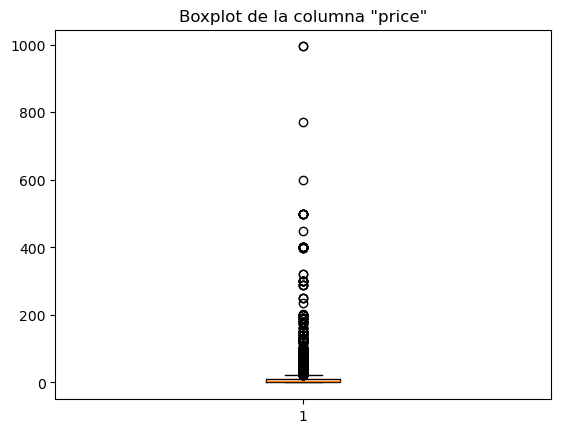

In [417]:
# Crear un gráfico de caja para visualizar outliers
plt.boxplot(df_juegos['price'])
plt.title('Boxplot de la columna "price"')
plt.show()


In [418]:
# Eliminar outliers del DataFrame original
df_juegos = df_juegos[(df_juegos['price'] >= lower_limit) & (df_juegos['price'] <= upper_limit)]



pese a que ya hemos eliminado los outliers veamos como han cambiado las estadisticas

In [419]:
# Obtener estadísticas resumidas para la columna "price"
estadisticas_precios = df_juegos['price'].describe()

# Imprimir las estadísticas resumidas
print("\nEstadísticas resumidas para la columna 'price':")
print(estadisticas_precios)


Estadísticas resumidas para la columna 'price':
count   70649.000
mean        6.091
std         5.392
min         0.000
25%         1.990
50%         4.990
75%         9.990
max        21.990
Name: price, dtype: float64


disminuye bastante el error estandar. Pero tambièn se mantiene la diferencia amplia de precios en el ultimo cuartil. Vamos a observar cómo se comportan los datos al normalizar y luego vamos a comparar la gráfica directa de los datos sin outliers y la gráfica con los valores transformados

#### **Transformaciones**

In [420]:
umbral_frecuencia = 1  # Puedes ajustar este umbral según sea necesario

# Filtrar valores con frecuencia menor o igual al umbral
df_frecuencia_filtrada = df_frecuencia_precios[df_frecuencia_precios['Frecuencia'] >= umbral_frecuencia].copy()

# Normalización min-max
min_price = df_frecuencia_filtrada['Precio'].min()
max_price = df_frecuencia_filtrada['Precio'].max()
df_frecuencia_filtrada['price'] = df_frecuencia_filtrada['Precio']
df_frecuencia_filtrada['price_norm'] = (df_frecuencia_filtrada['Precio'] - min_price) / (max_price - min_price)

# Agrupar por rangos de precios
bins = [0, 1, 5, 10, 20, 50, 100, 200, np.inf]  # Modificado para terminar en 100
labels = ['0-1', '1-5', '5-10', '10-20', '20-50', '50-100', '100-200', "200-500"]
df_frecuencia_filtrada['price_groupnorm'] = pd.cut(df_frecuencia_filtrada['Precio'], bins=bins, labels=labels, right=False)

# Verificar los resultados
print(df_frecuencia_filtrada[['price', 'Frecuencia', 'price_norm', 'price_groupnorm']])

      price  Frecuencia  price_norm price_groupnorm
0     4.990        9893       0.005             1-5
1     9.990        9010       0.010            5-10
2     0.000        8465       0.000             0-1
3     2.990        7834       0.003             1-5
4     0.990        6319       0.001             0-1
..      ...         ...         ...             ...
142   2.890           1       0.003             1-5
143  99.000           1       0.099          50-100
144 599.000           1       0.602         200-500
145   8.980           1       0.009            5-10
146 234.990           1       0.236         200-500

[147 rows x 4 columns]


In [421]:
# Seleccionar las columnas relevantes para el merge
df_frecuencia_filtrada = df_frecuencia_filtrada[['Precio', 'price_norm', 'price_groupnorm']]

# Renombrar las columnas para que coincidan con df_juegos
df_frecuencia_filtrada.columns = ['price', 'price_norm', 'price_groupnorm']

# Merge con df_juegos usando 'price' como llave
df_juegos = pd.merge(df_juegos, df_frecuencia_filtrada, on='price', how='inner')

# Verificar los resultados
df_juegos


,item_id,publisher,genres,app_name,price,early_access,developer,year_release,price_norm,price_groupnorm
0,761140,Kotoshiro,Action,Lost Summoner Kitty,4.990,False,kotoshiro,2018,0.005,1-5
1,761140,Kotoshiro,Casual,Lost Summoner Kitty,4.990,False,kotoshiro,2018,0.005,1-5
2,761140,Kotoshiro,Indie,Lost Summoner Kitty,4.990,False,kotoshiro,2018,0.005,1-5
3,761140,Kotoshiro,Simulation,Lost Summoner Kitty,4.990,False,kotoshiro,2018,0.005,1-5
4,761140,Kotoshiro,Strategy,Lost Summoner Kitty,4.990,False,kotoshiro,2018,0.005,1-5
...,...,...,...,...,...,...,...,...,...,...
70644,227180,Sin dato,Indie,Kingdom Wars,19.980,False,reverie world studios,2013,0.020,10-20
70645,227180,Sin dato,Massively Multiplayer,Kingdom Wars,19.980,False,reverie world studios,2013,0.020,10-20
70646,227180,Sin dato,RPG,Kingdom Wars,19.980,False,reverie world studios,2013,0.020,10-20
70647,227180,Sin dato,Simulation,Kingdom Wars,19.980,False,reverie world studios,2013,0.020,10-20


In [422]:
# Crear un DataFrame para almacenar los rangos de precios por categoría
rangos_por_categoria = {}

# Definir el orden personalizado de las categorías
orden_categorias = ['0-1', '1-5', '5-10', '10-20', '20-50', '50-100', '100-200', '200-500']

# Convertir las categorías a un tipo categórico con el orden personalizado
df_juegos['price_groupnorm'] = pd.Categorical(df_juegos['price_groupnorm'], categories=orden_categorias, ordered=True)

# Iterar sobre las categorías en el orden personalizado
for categoria in orden_categorias:
    # Filtrar el DataFrame por la categoría actual y obtener los valores únicos de precios
    valores_precio_categoria = df_juegos[df_juegos['price_groupnorm'] == categoria]['price']

    # Verificar si hay valores en la categoría actual
    if not valores_precio_categoria.empty:
        # Obtener el rango de precios como una tupla (min, max)
        rango_precio = (valores_precio_categoria.min(), valores_precio_categoria.max())

        # Almacenar el rango en el diccionario
        rangos_por_categoria[categoria] = rango_precio

# Crear un DataFrame a partir del diccionario de rangos
df_rangos_por_categoria = pd.DataFrame(list(rangos_por_categoria.items()), columns=['Categoria', 'Rango de Precios'])

df_rangos_por_categoria = pd.DataFrame(list(rangos_por_categoria.items()), columns=['Categoria', 'Rango de Precios'])

# Añadir la columna con la suma de frecuencias de price_groupnorm al DataFrame
df_rangos_por_categoria['Suma de Frecuencias'] = df_rangos_por_categoria['Categoria'].apply(lambda x: len(df_juegos[df_juegos['price_groupnorm'] == x]))

# Imprimir el DataFrame resultante
print(df_rangos_por_categoria)



  Categoria Rango de Precios  Suma de Frecuencias
0       0-1      (0.0, 0.99)                14801
1       1-5      (1.0, 4.99)                27945
2      5-10      (5.0, 9.99)                17489
3     10-20    (10.0, 19.99)                10382
4     20-50    (20.0, 21.99)                   32


#### **Gráfica price normalizado**

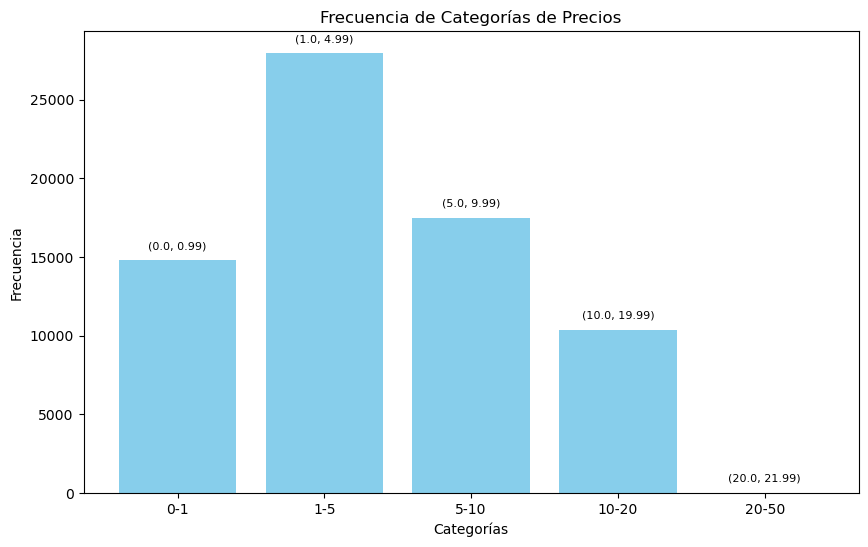

In [423]:
# Usar las variables ya generadas
categorias = df_rangos_por_categoria['Categoria']
frecuencias = df_rangos_por_categoria['Suma de Frecuencias']
rangos_precios = df_rangos_por_categoria['Rango de Precios']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(categorias, frecuencias, color='skyblue')

# Agregar texto encima de cada barra con el rango de precios correspondiente
for i in range(len(categorias)):
    plt.text(categorias[i], frecuencias[i] + 900, str(rangos_precios[i]), ha='center', va='center', rotation=0, fontsize=8, color='black')

# Configurar el título y las etiquetas de los ejes
plt.title('Frecuencia de Categorías de Precios')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()


#### **Gráfica price directo sin outliers**

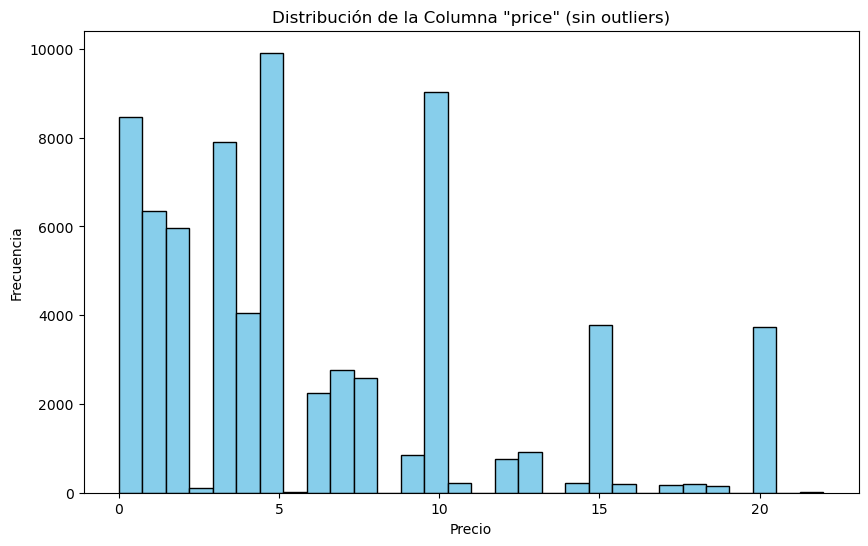

In [424]:
# Crear un gráfico de barras para visualizar la columna 'price'
plt.figure(figsize=(10, 6))
plt.hist(df_juegos['price'], bins=30, color='skyblue', edgecolor='black')

# Configurar el título y las etiquetas de los ejes
plt.title('Distribución de la Columna "price" (sin outliers)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()


El graficar sin outliers permite observar mejor la tendencia de los datos de interés. Entre la primera gráfica y la segunda la diferencia se observa sobre todo en la reducción de las categorías, visualmente las barras de frecuencia se vuelven más claras.

### **1.4. Juegos**

#### **Cantidad total**

In [425]:
# Contar valores únicos en la columna 'item_id'
total_juegos = df_juegos['item_id'].nunique()

# Eliminar duplicados, valores perdidos y "Sin dato"
df_juegos_cleaned = df_juegos['item_id'].str.lower().replace('sin dato', pd.NA).dropna().drop_duplicates()

# Contar valores perdidos y "Sin dato" después de la limpieza
valores_perdidos = df_juegos['item_id'].isna().sum()
sin_dato_count = (df_juegos['item_id'].str.lower() == 'sin dato').sum()

# Imprimir resultados
print(f"Total de juegos únicos: {total_juegos}")
print(f"Valores perdidos: {valores_perdidos}")
print(f"\"Sin dato\" count: {sin_dato_count}")


Total de juegos únicos: 30258
Valores perdidos: 0
"Sin dato" count: 2


appname y title no tienen mucho que graficar

#### **Juegos por genero**

c:\Users\Legion 5 3060\.conda\envs\SoyHenryProyectconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Legion 5 3060\.conda\envs\SoyHenryProyectconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Legion 5 3060\.conda\envs\SoyHenryProyectconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


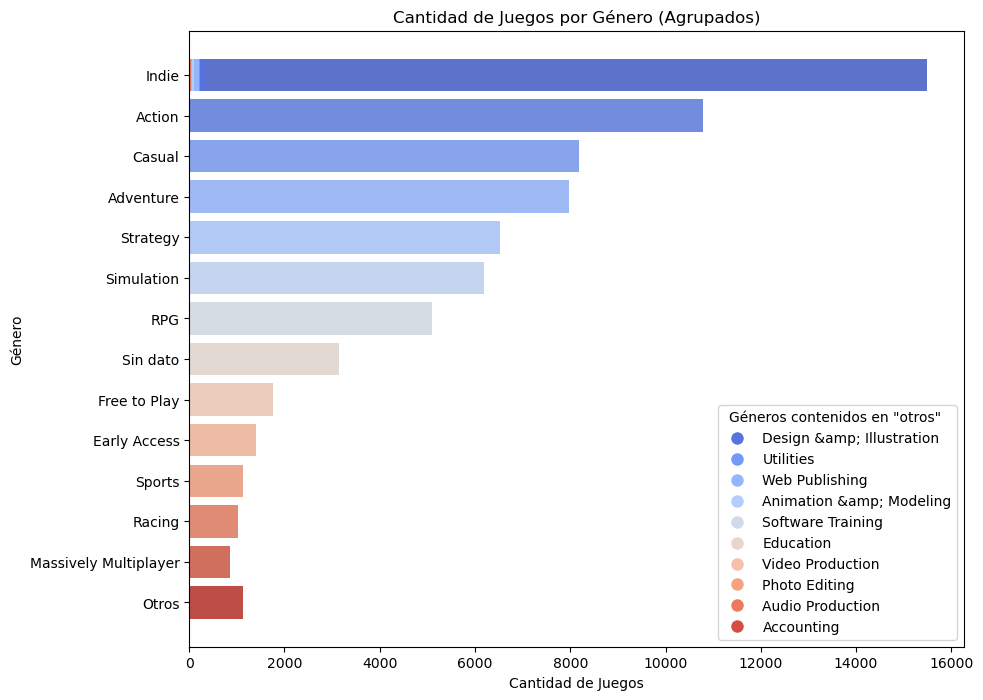

In [426]:
# Dividir la columna 'genres' que contiene varios géneros separados por comas
generos_separados = df_juegos['genres'].str.split(',')

# Crear una lista plana de todos los géneros
todos_los_generos = [genero.strip() for sublist in generos_separados.dropna() for genero in sublist]

# Contar la frecuencia de cada género
conteo_generos = pd.Series(todos_los_generos).value_counts()

# Obtener los 10 géneros con menos cantidad
generos_menos_comunes = conteo_generos.tail(10).index

# Agrupar los 10 géneros menos comunes en una sola entrada llamada 'Otros'
conteo_generos_agrupado = conteo_generos.copy()
conteo_generos_agrupado['Otros'] = conteo_generos[generos_menos_comunes].sum()
conteo_generos_agrupado = conteo_generos_agrupado.drop(generos_menos_comunes)

# Obtener colores para 'Otros' en función de la cantidad de juegos en esos géneros
colores_otros = sns.color_palette("coolwarm", len(generos_menos_comunes))

# Crear un gráfico de barras horizontales con colores personalizados para cada género
plt.figure(figsize=(10, 8))
barplot = sns.barplot(x=conteo_generos_agrupado.values, y=conteo_generos_agrupado.index, palette="coolwarm", saturation=0.8)

# Añadir barras separadas para cada género dentro de 'Otros' con colores personalizados
for i, genero in enumerate(generos_menos_comunes):
    plt.barh('Otros', conteo_generos[genero], color=colores_otros[i])

# Configurar el título y las etiquetas de los ejes
plt.title('Cantidad de Juegos por Género (Agrupados)')
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Género')

# Añadir una leyenda solo para 'Otros'
legend_labels = [(genero, colores_otros[i]) for i, genero in enumerate(generos_menos_comunes)]
barplot.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for label, color in legend_labels], title='Géneros contenidos en "otros" ')

# Mostrar el gráfico
plt.show()


In [427]:
# Dividir la columna 'genres' que contiene varios géneros separados por comas
generos_separados = df_juegos['genres'].str.split(',')

# Crear una lista plana de todos los géneros
todos_los_generos = [genero.strip() for sublist in generos_separados.dropna() for genero in sublist]

# Contar la frecuencia de cada género
conteo_generos = pd.Series(todos_los_generos).value_counts()

# Calcular el porcentaje de juegos por género
porcentaje_generos = (conteo_generos / len(df_juegos) * 100).round(2)

# Crear un DataFrame con los resultados
df_resultado = pd.DataFrame({
    'Cantidad de Juegos': conteo_generos,
    'Porcentaje': porcentaje_generos
})

# Agregar el signo de porcentaje al formato de la columna 'Porcentaje'
df_resultado['Porcentaje'] = df_resultado['Porcentaje'].astype(str) + '%'

# Imprimir el DataFrame resultante
df_resultado


,Cantidad de Juegos,Porcentaje
Indie,15493,21.93%
Action,10778,15.26%
Casual,8173,11.57%
Adventure,7963,11.27%
Strategy,6515,9.22%
Simulation,6184,8.75%
RPG,5090,7.2%
Sin dato,3153,4.46%
Free to Play,1755,2.48%
Early Access,1398,1.98%


#### **Top 5 Juegos más caros por raking de año con mayores ventas**

In [428]:
# Eliminar duplicados en item_Id
df_juegos_no_duplicados = df_juegos.drop_duplicates(subset='item_id')

# Calcular la suma de ventas por año
ventas_por_anio = df_juegos_no_duplicados.groupby('year_release')['price'].sum()

# Seleccionar los tres años con mayores ventas
top_tres_anios = ventas_por_anio.nlargest(3).index

# Filtrar el DataFrame original para incluir solo los juegos de los tres años seleccionados
df_top_tres_anios = df_juegos_no_duplicados[df_juegos_no_duplicados['year_release'].isin(top_tres_anios)]

# Para cada año, mostrar el top 5 de juegos más caros
for anio in top_tres_anios:
    top_5_juegos_anio = df_top_tres_anios[df_top_tres_anios['year_release'] == anio].nlargest(5, 'price')
    print(f'\nTop 5 juegos más caros en {anio}:\n')
    print(top_5_juegos_anio[['app_name', 'price']])



Top 5 juegos más caros en 2017:

                                                app_name  price
70485  STAR OCEAN™ - THE LAST HOPE -™ 4K & Full HD Re... 20.990
70528  Steel Division: Normandy 44 - Deluxe Edition U... 20.000
70531                                            ESSENCE 20.000
62810  Fantasy Grounds - The Last Parsec: Core (Savag... 19.990
62813                   Fishing Planet: Winter Pike Pack 19.990

Top 5 juegos más caros en 2016:

                                       app_name  price
70484           ARSLAN - Original Costume Set 1 20.990
70487                          FINAL FANTASY IX 20.990
70522  Black Desert Online - Traveler's Package 20.000
70535                                  Factorio 20.000
62486    FSX: Steam Edition - Extra 300S Add-On 19.990

Top 5 juegos más caros en 2015:

                                       app_name  price
70427           Trine 3: The Artifacts of Power 21.990
70430                   SW4-II - Edit Parts Set 21.990
70431            SW

### **1.5. Desarrolladores**

c:\Users\Legion 5 3060\.conda\envs\SoyHenryProyectconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Legion 5 3060\.conda\envs\SoyHenryProyectconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Legion 5 3060\.conda\envs\SoyHenryProyectconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


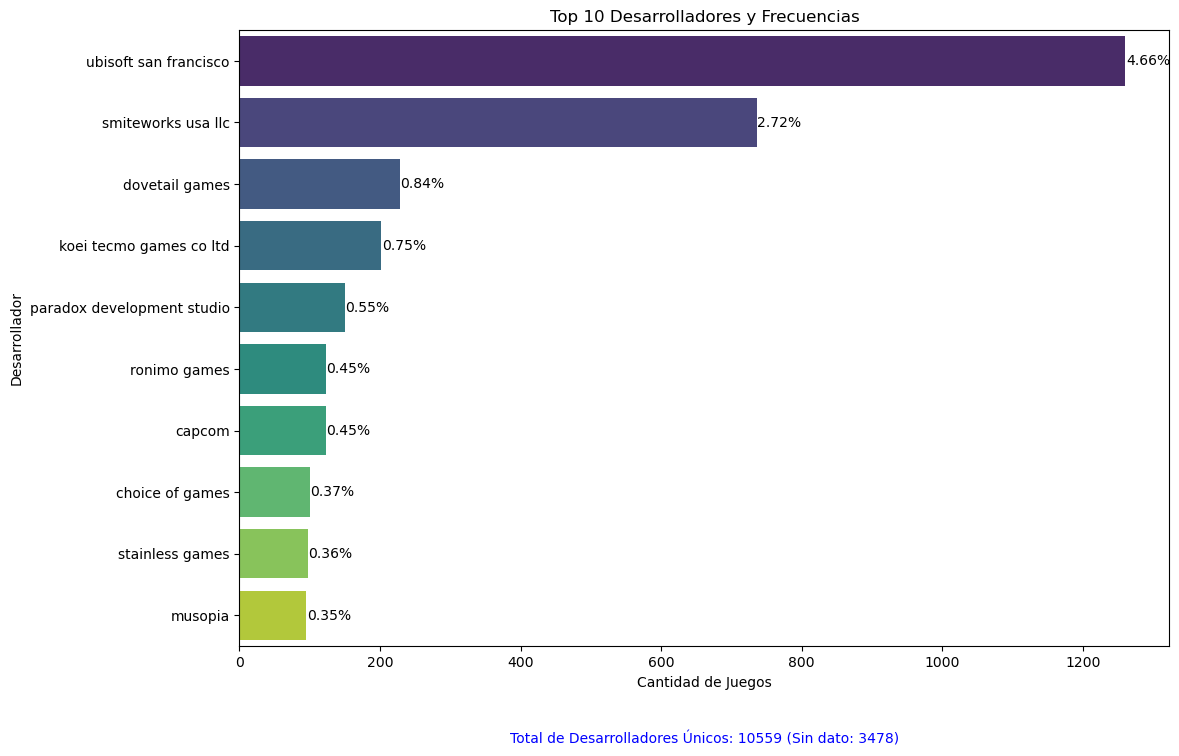

In [429]:
# Eliminar duplicados de item_id
df_juegos_sin_duplicados = df_juegos.drop_duplicates(subset='item_id')

# Quitar los valores "Sin dato" (mayúsculas o minúsculas) de la columna 'developer'
df_juegos_sin_duplicados = df_juegos_sin_duplicados[df_juegos_sin_duplicados['developer'].str.lower() != 'sin dato']

# Contar la frecuencia de cada desarrollador
conteo_desarrolladores = df_juegos_sin_duplicados['developer'].value_counts()

# Obtener los top 10 desarrolladores
top_10_desarrolladores = conteo_desarrolladores.head(10)

# Calcular el total de desarrolladores únicos, incluyendo "Sin dato"
total_desarrolladores = len(df_juegos_sin_duplicados['developer'].unique())
total_sin_dato = len(df_juegos[df_juegos['developer'].str.lower() == 'sin dato'])

# Crear un gráfico de barras horizontales
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_10_desarrolladores.values, y=top_10_desarrolladores.index, palette="viridis")

# Añadir texto con el total de desarrolladores en alguna parte del gráfico
ax.text(0.5, -0.15, f'Total de Desarrolladores Únicos: {total_desarrolladores} (Sin dato: {total_sin_dato})', ha='center', va='center', transform=ax.transAxes, color='blue')

# Añadir el porcentaje en cada barra
for i, v in enumerate(top_10_desarrolladores.values):
    porcentaje = (v / len(df_juegos_sin_duplicados['developer']) * 100).round(2)
    ax.text(v + 1, i, f'{porcentaje}%', va='center', color='black')

# Configurar el título y las etiquetas de los ejes
plt.title('Top 10 Desarrolladores y Frecuencias')
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Desarrollador')

# Mostrar el gráfico
plt.show()


### **1.6. Año de lanzamiento**

#### **conversion**

In [430]:
# Convertir la columna 'year_release' a tipo de dato int64 con manejo de errores 'coerce'
df_juegos['year_release'] = pd.to_numeric(df_juegos['year_release'], errors='coerce').astype('Int64')


# Quitar valores NaN de la columna 'year_release'
df_juegos = df_juegos.dropna(subset=['year_release'])

# Ver estadísticas descriptivas de la columna 'year_release'
estadisticos_year_release = df_juegos['year_release'].describe()

estadisticos_year_release

count   68373.000
mean     2015.167
std         2.981
min      1970.000
25%      2015.000
50%      2016.000
75%      2017.000
max      2021.000
Name: year_release, dtype: Float64

#### **Frecuencia de valores unicos**

In [431]:
# Obtener los valores únicos de 'year_release' ordenados de mayor a menor
valores_unicos_ordenados = sorted(df_juegos['year_release'].unique(), reverse=True)

# Crear un DataFrame con los valores únicos ordenados
df_valores_unicos_ordenados = pd.DataFrame(valores_unicos_ordenados, columns=['year_release'])

# Agregar una columna con el conteo de frecuencias
df_valores_unicos_ordenados['frecuencia'] = df_valores_unicos_ordenados['year_release'].apply(lambda x: df_juegos[df_juegos['year_release'] == x].shape[0])

# Mostrar el DataFrame resultante
print(df_valores_unicos_ordenados)


    year_release  frecuencia
0           2021           3
1           2019          13
2           2018         483
3           2017       23878
4           2016       17060
5           2015       11677
6           2014        6037
7           2013        2855
8           2012        2087
9           2011        1022
10          2010         688
11          2009         505
12          2008         344
13          2007         276
14          2006         227
15          2005         144
16          2004         107
17          2003         128
18          2002          70
19          2001         119
20          2000          60
21          1999          87
22          1998          86
23          1997          67
24          1996          60
25          1995          51
26          1994          56
27          1993          49
28          1992          26
29          1991          26
30          1990          16
31          1989          14
32          1988          11
33          19

#### **Gráfica en bruto**

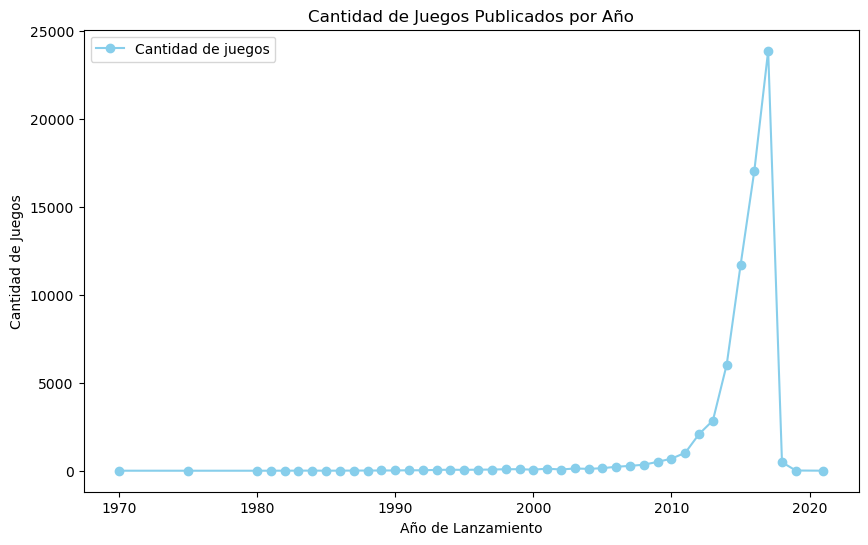

In [432]:
# Agrupar por año y contar la frecuencia
frecuencia_por_anio = df_juegos['year_release'].value_counts().sort_index()

# Crear un gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(frecuencia_por_anio.index, frecuencia_por_anio.values, marker='o', linestyle='-', color='skyblue', label='Cantidad de juegos')

# Configurar el título y las etiquetas de los ejes
plt.title('Cantidad de Juegos Publicados por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Juegos')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


#### **Gráfica con agrupaciones**

C:\Users\Legion 5 3060\AppData\Local\Temp\ipykernel_37368\863321034.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_juegos['year_grouped'] = df_juegos['year_release'].astype(str).apply(lambda x: x if int(x) >= 2011 else '1980-2011')


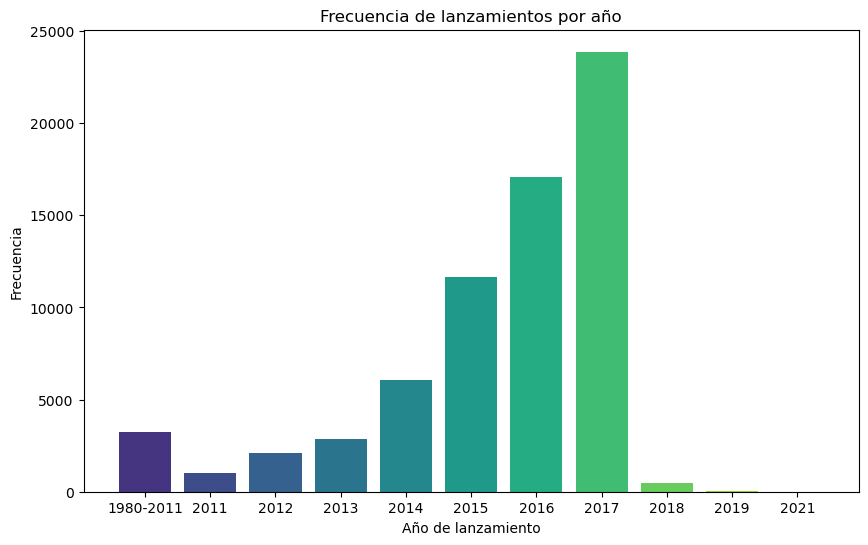

In [433]:
# Convertir 'year_release' a cadena antes de aplicar la condición en apply
df_juegos['year_grouped'] = df_juegos['year_release'].astype(str).apply(lambda x: x if int(x) >= 2011 else '1980-2011')

# Obtener los valores únicos de 'year_grouped' ordenados de mayor a menor
valores_unicos_ordenados = ['1980-2011'] + sorted(df_juegos['year_grouped'].unique(), reverse=False)

# Crear un DataFrame con los valores únicos ordenados
df_valores_unicos_ordenados = pd.DataFrame(valores_unicos_ordenados, columns=['year_grouped'])

# Agregar una columna con el conteo de frecuencias
df_valores_unicos_ordenados['frecuencia'] = df_valores_unicos_ordenados['year_grouped'].apply(lambda x: df_juegos[df_juegos['year_grouped'] == x].shape[0])

# Crear una paleta de colores con gradiente
colores = sns.color_palette("viridis", len(df_valores_unicos_ordenados))

# Graficar el DataFrame resultante con barras coloreadas
plt.figure(figsize=(10, 6))
plt.bar(df_valores_unicos_ordenados['year_grouped'], df_valores_unicos_ordenados['frecuencia'], color=colores)
plt.xlabel('Año de lanzamiento')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de lanzamientos por año')
plt.show()


#### **Grafica eliminando outliers**

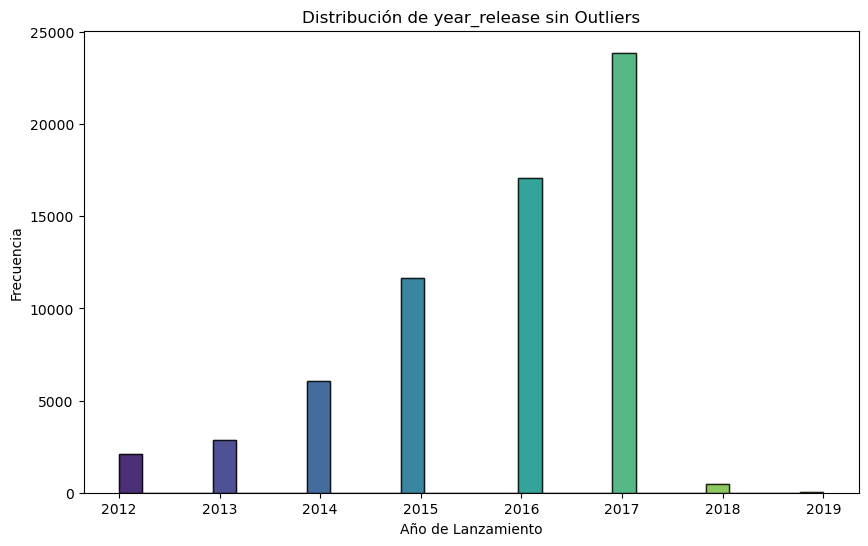

In [434]:
# Calcular el rango intercuartílico (IQR)
Q1 = df_juegos['year_release'].quantile(0.25)
Q3 = df_juegos['year_release'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites inferior y superior para identificar outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrar el DataFrame para quitar outliers
df_juegos_cleaned = df_juegos[(df_juegos['year_release'] >= lower_limit) & (df_juegos['year_release'] <= upper_limit)]

# Crear un histograma de la distribución limpia con gradiente de color
fig, ax = plt.subplots(figsize=(10, 6))

# Calcular la frecuencia y asignar colores con un mapa de colores
n, bins, _ = plt.hist(df_juegos_cleaned['year_release'].dropna(), bins=30, edgecolor='black', alpha=0.7)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
colormap = plt.cm.viridis
colors = colormap(np.linspace(0, 1, len(bin_centers)))

# Crear barras utilizando plt.bar para tener control sobre los colores de cada barra
bars = ax.bar(bin_centers, n, width=np.diff(bins), color=colors, edgecolor='black', alpha=0.7)

# Configurar el título y las etiquetas de los ejes
ax.set_title('Distribución de year_release sin Outliers')
ax.set_xlabel('Año de Lanzamiento')
ax.set_ylabel('Frecuencia')


# Mostrar la gráfica
plt.show()


## **2. EDA user items: df_usit**

### **2.1. Info general**

In [435]:
print(df_usit.info())
print(df_usit.head())

<class 'pandas.core.frame.DataFrame'>
Index: 5094105 entries, 0 to 5153208
Data columns (total 5 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   steam_id          object
 2   item_id           object
 3   item_name         object
 4   playtime_forever  int64 
dtypes: int64(1), object(4)
memory usage: 233.2+ MB
None
             user_id           steam_id item_id                  item_name  \
0  76561197970982479  76561197970982479      10             Counter-Strike   
1  76561197970982479  76561197970982479      20      Team Fortress Classic   
2  76561197970982479  76561197970982479      30              Day of Defeat   
3  76561197970982479  76561197970982479      40         Deathmatch Classic   
4  76561197970982479  76561197970982479      50  Half-Life: Opposing Force   

   playtime_forever  
0                 6  
1                 0  
2                 7  
3                 0  
4                 0  


### **2.2.  Tiempo de juego**

In [436]:
# Crear un DataFrame temporal para almacenar la información agregada
df_usit_temp = df_usit.copy()

# Crear un nuevo DataFrame con la suma de las horas totales por usuario
df_total_playtime_por_usuario = df_usit_temp.groupby('user_id')['playtime_forever'].sum().reset_index()

# Mostrar el nuevo DataFrame
print(df_total_playtime_por_usuario)


                 user_id  playtime_forever
0                --000--            141027
1                --ace--             70382
2              --ionex--             48084
3           -2SV-vuLB-Kg             54249
4      -404PageNotFound-            231260
...                  ...               ...
70907             zzonci               429
70908        zzoptimuszz             82417
70909            zzydrax              4640
70910              zzyfo             61587
70911         zzzmidmiss             12330

[70912 rows x 2 columns]


In [437]:
# Obtener estadísticas descriptivas de las horas de juego por usuario
estadisticos_playtime = df_total_playtime_por_usuario['playtime_forever'].describe()

# Mostrar los resultados
print(estadisticos_playtime)




count     70912.000
mean      71158.214
std       88477.459
min           0.000
25%       11493.000
50%       44173.000
75%      101082.250
max     4660393.000
Name: playtime_forever, dtype: float64


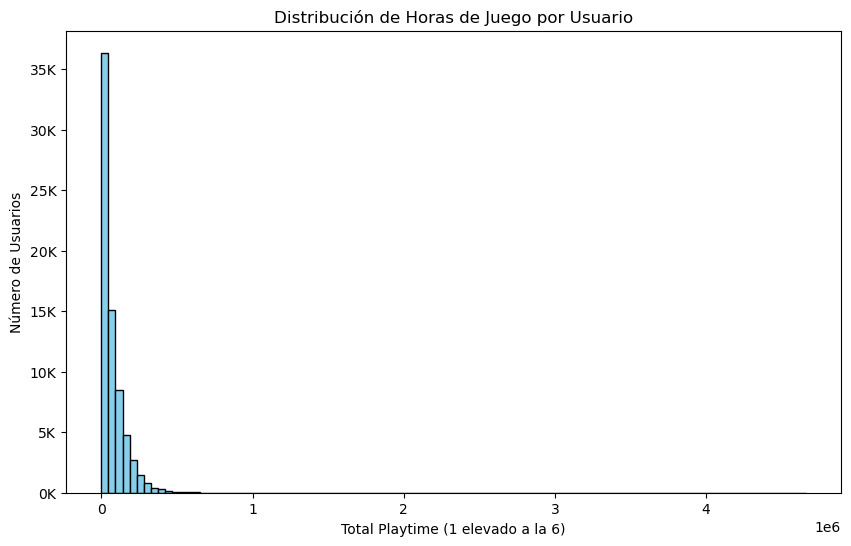

In [438]:
# Especificar 100 bins para el histograma
bins = 100

# Graficar el histograma de las horas de juego por usuario
plt.figure(figsize=(10, 6))
plt.hist(df_total_playtime_por_usuario['playtime_forever'], bins=bins, color='skyblue', edgecolor='black')

# Configurar el título y las etiquetas del eje
plt.title('Distribución de Horas de Juego por Usuario')
plt.xlabel('Total Playtime (1 elevado a la 6)')
plt.ylabel('Número de Usuarios')

# Desactivar la notación científica en el eje y y dividir las etiquetas por 1000
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
plt.gca().yaxis.set_major_formatter(lambda x, _: f'{int(x/1000)}K')

# Mostrar el gráfico
plt.show()


los datos se encuentran sumamente dispersos. Vamos a excluir valores muy altos

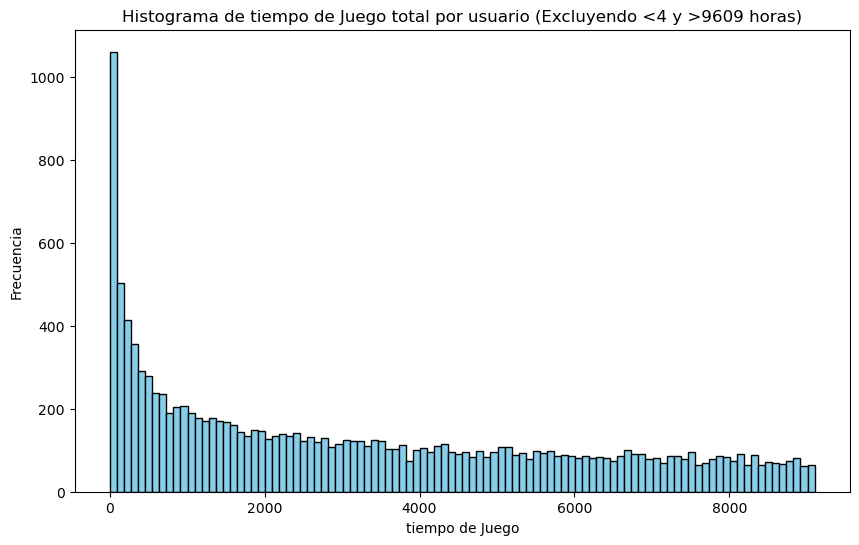

In [439]:
# Filtrar el DataFrame para excluir aquellos que juegan menos de 4 y más de 9100 unidades
df_filtered = df_total_playtime_por_usuario[(df_total_playtime_por_usuario['playtime_forever'] >= 4) & (df_total_playtime_por_usuario['playtime_forever'] <= 9100)]

# Crear un histograma con los datos filtrados
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['playtime_forever'], bins=100, color='skyblue', edgecolor='black')
plt.title('Histograma de tiempo de Juego total por usuario (Excluyendo <4 y >9609 horas)')
plt.xlabel('tiempo de Juego')
plt.ylabel('Frecuencia')
plt.show()


#### **2.2.1. Cambio de minutos a horas**

El hecho de que se concentren los valores en torno a numeros pequeños, la alta presencia de outliers, la media muy baja con la gran dispersion, permite concluir que la columna tiene el tiempo de juego en minutos. Por ello vamos a cambiar los minutos por horas

In [440]:
# pasar la columna de minutos a horas
df_usit["playtime_forever"] = df_usit["playtime_forever"]/60

In [441]:
df_usit

,user_id,steam_id,item_id,item_name,playtime_forever
0,76561197970982479,76561197970982479,10,Counter-Strike,0.100
1,76561197970982479,76561197970982479,20,Team Fortress Classic,0.000
2,76561197970982479,76561197970982479,30,Day of Defeat,0.117
3,76561197970982479,76561197970982479,40,Deathmatch Classic,0.000
4,76561197970982479,76561197970982479,50,Half-Life: Opposing Force,0.000
...,...,...,...,...,...
5153204,76561198329548331,76561198329548331,346330,BrainBread 2,0.000
5153205,76561198329548331,76561198329548331,373330,All Is Dust,0.000
5153206,76561198329548331,76561198329548331,388490,One Way To Die: Steam Edition,0.050
5153207,76561198329548331,76561198329548331,521570,You Have 10 Seconds 2,0.067


veamos como cambiaron los estadisticos

In [442]:
# Crear un DataFrame temporal para almacenar la información agregada
df_usit_temp = df_usit.copy()

# Agregar una columna con la suma total por user_id
df_usit_temp['total_playtime'] = df_usit_temp.groupby('user_id')['playtime_forever'].transform('sum')

# Calcular estadísticas descriptivas para la columna total_playtime
stats_total_playtime = df_usit_temp['total_playtime'].describe()

# Mostrar estadísticas descriptivas
print(stats_total_playtime)

count   5094105.000
mean       2431.714
std        3112.136
min           0.000
25%         910.650
50%        1771.100
75%        3068.567
max       77673.217
Name: total_playtime, dtype: float64


Vamos a graficarlo, sumando las horas por user_id

In [443]:
# Crear un DataFrame auxiliar para almacenar la información agregada
df_auxiliar = pd.DataFrame()

# Agregar una columna con la suma total por user_id
df_auxiliar['user_id'] = df_usit['user_id'].unique()
df_auxiliar['total_playtime'] = df_usit.groupby('user_id')['playtime_forever'].sum().values


Graficamos acotando a menos de 8000 horas

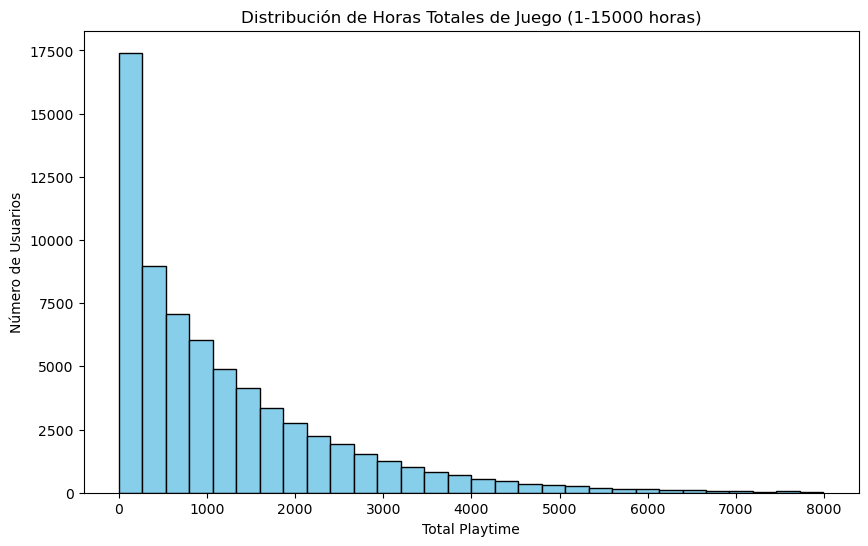

In [444]:
# Filtrar el DataFrame para incluir solo usuarios que juegan más de 1 hora y menos de 15000 horas
df_filtered = df_auxiliar[(df_auxiliar['total_playtime'] > 1) & (df_auxiliar['total_playtime'] < 8000)]

# Especificar el número de bins para el histograma
bins = 30

# Graficar el histograma de las horas totales de juego por usuario (filtrado)
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['total_playtime'], bins=bins, color='skyblue', edgecolor='black')

# Configurar el título y las etiquetas del eje
plt.title('Distribución de Horas Totales de Juego (1-15000 horas)')
plt.xlabel('Total Playtime')
plt.ylabel('Número de Usuarios')

# Mostrar el gráfico
plt.show()


### **2.3. Items por usuario**

In [445]:
# Agrupar por 'user_id' y contar elementos únicos en 'item_id'
user_item_counts = df_usit.groupby('user_id')['item_id'].nunique()

# Calcular estadísticas descriptivas
user_item_stats = user_item_counts.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

# Imprimir los resultados
print("\nEstadísticas descriptivas de la cantidad de items por usuario:")
print(user_item_stats)



Estadísticas descriptivas de la cantidad de items por usuario:
count   70912.000
mean       71.837
std       132.367
min         1.000
10%         4.000
20%        10.000
30%        18.000
40%        28.000
50%        40.000
60%        54.000
70%        75.000
80%       104.000
90%       161.000
max      7762.000
Name: item_id, dtype: float64


 71,912 usuarios, la cantidad promedio de elementos únicos ('item_id') por usuario es de aproximadamente 71.84, con una considerable variabilidad representada por una desviación estándar de 132.37. El 50% de los usuarios tiene 40 o menos elementos únicos, destacando la presencia de una mediana en 40.

El análisis de percentiles revela que el 80% de los usuarios tienen 104 o menos elementos únicos, mientras que el 10% superior muestra comportamientos excepcionales, con hasta 7762 elementos únicos

### **2.4. Titulos más jugados**

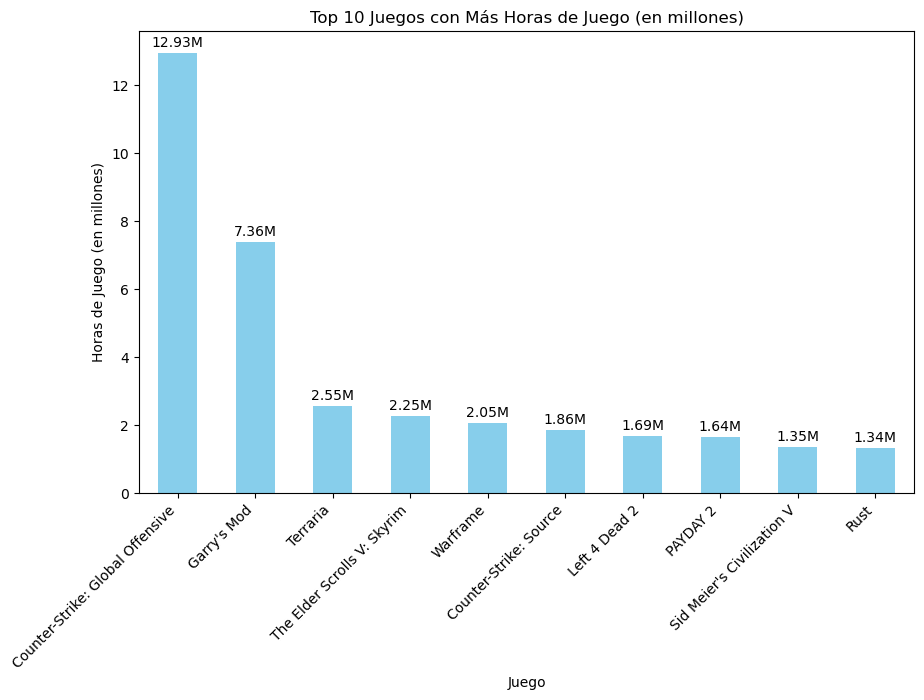

In [446]:
# Agrupa por juego y suma las horas de juego
total_hours = df_usit.groupby('item_name')['playtime_forever'].sum().nlargest(10) / 1000000  # Dividir por 1000 para mostrar en millares

# Graficar
plt.figure(figsize=(10, 6))
total_hours.plot(kind='bar', color='skyblue')
plt.title('Top 10 Juegos con Más Horas de Juego (en millones)')
plt.xlabel('Juego')
plt.ylabel('Horas de Juego (en millones)')
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas de valor en las barras
for i, value in enumerate(total_hours):
    plt.text(i, value + 0.1, f'{value:.2f}M', ha='center', va='bottom')

plt.show()


### **2.5. top jugadores con mas horas**

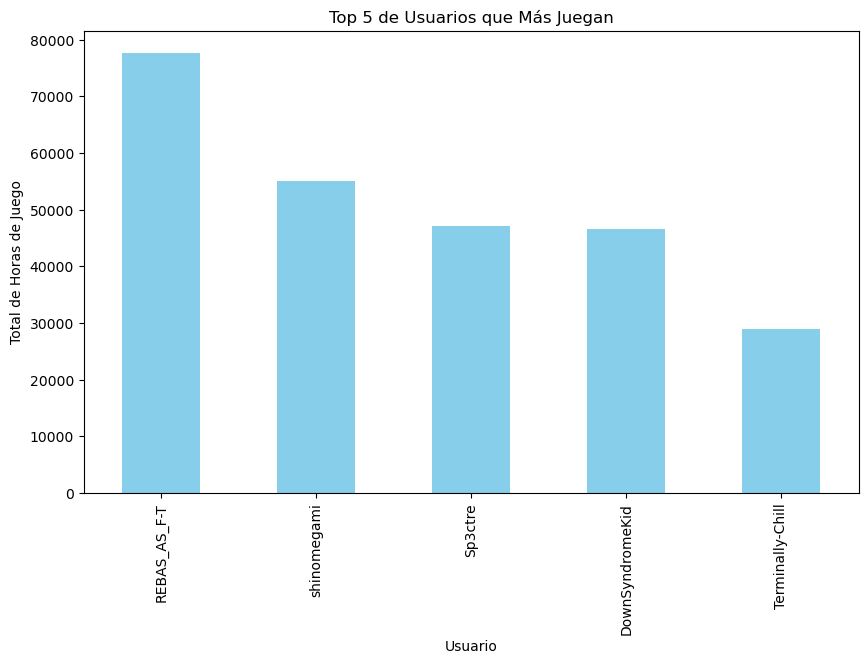

In [447]:
# Sumar todas las horas de juego por usuario
total_hours_per_user = df_usit.groupby('user_id')['playtime_forever'].sum()

# Obtener el top 5 de usuarios que más juegan
top_users = total_hours_per_user.nlargest(5).index

# Filtrar el DataFrame original para obtener solo las filas de los usuarios con más horas
top_users_df = df_usit[df_usit['user_id'].isin(top_users)]

# Graficar el top 5 de usuarios que más juegan
plt.figure(figsize=(10, 6))
total_hours_per_user.nlargest(5).plot(kind='bar', color='skyblue')
plt.title('Top 5 de Usuarios que Más Juegan')
plt.xlabel('Usuario')
plt.ylabel('Total de Horas de Juego')

# Desactivar notación científica en el eje y
plt.ticklabel_format(style='plain', axis='y')

plt.show()


## **3. EDA users review: df_users_review_curado_sentiments**

### **3.1. Info general**

In [448]:
print(df_users_review_curado_sentiments.info())
print(df_users_review_curado_sentiments.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58400 entries, 0 to 58399
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          58400 non-null  object
 1   item_id          58400 non-null  int64 
 2   recommend        58400 non-null  bool  
 3   review           58400 non-null  object
 4   year_review      58400 non-null  object
 5   Sentiment_Score  58400 non-null  int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 2.3+ MB
None
             user_id  item_id  recommend  \
0  76561197970982479     1250       True   
1  76561197970982479    22200       True   
2  76561197970982479    43110       True   
3            js41637   251610       True   
4            js41637   227300       True   

                                              review year_review  \
0  Simple yet with great replayability. In my opi...      2011.0   
1               It's unique and worth a playthrough.      2011.0   

### **3.2. recommend  **

c:\Users\Legion 5 3060\.conda\envs\SoyHenryProyectconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Legion 5 3060\.conda\envs\SoyHenryProyectconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Legion 5 3060\.conda\envs\SoyHenryProyectconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Legion 5 3060\.conda\envs\SoyHenryProyectconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is 

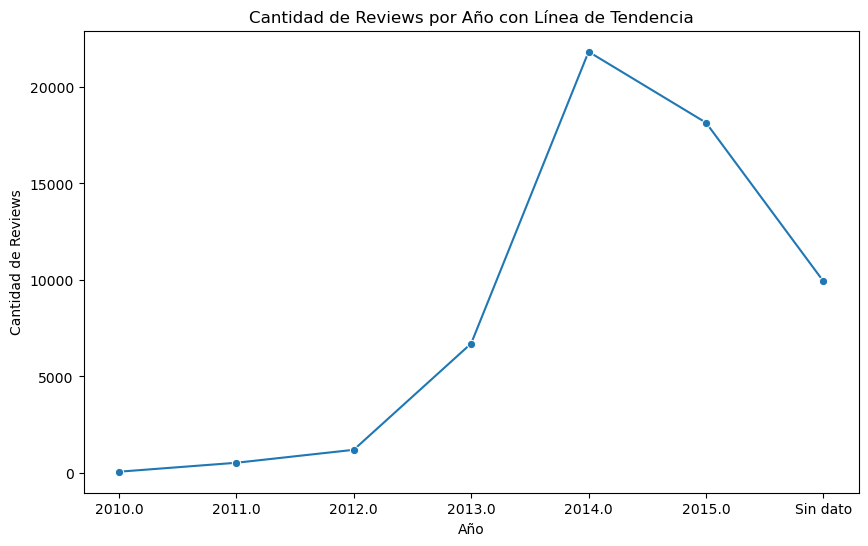

In [449]:
# Contar la cantidad de reviews por año
reviews_per_year = df_users_review_curado_sentiments['year_review'].value_counts().sort_index()

# Graficar la cantidad de reviews por año con línea de tendencia
plt.figure(figsize=(10, 6))
sns.lineplot(x=reviews_per_year.index, y=reviews_per_year.values, marker='o')

# Configurar el título y las etiquetas
plt.title('Cantidad de Reviews por Año con Línea de Tendencia')
plt.xlabel('Año')
plt.ylabel('Cantidad de Reviews')

# Mostrar el gráfico
plt.show()


La cantidad de reviews entre los años 2010 y 2015 muestran tres principales cambios. Del año 2012 al 2013 el incremento de los reviews fue de aproximadamente 5,000, mientras que del año 2013 al 2014 fue de aproximadamete 15,000 reviews, un incremento del 200%. Destaca una caida en la cantidad de reviews entre el año 2014 y el 2015 de 5,000.

### **3.3. Sentiment_Score x recommend**

In [450]:
# Convierte el Sentiment_Score a una variable categórica
df_users_review_curado_sentiments['Sentiment_Category'] = pd.cut(df_users_review_curado_sentiments['Sentiment_Score'],
                                                                 bins=[-0.1, 0.9, 1.9, 2.1],
                                                                 labels=[0, 1, 2],
                                                                 include_lowest=True)

# Calcula la frecuencia de cada combinación de Sentiment_Category y recommend
result_df = pd.crosstab(index=[df_users_review_curado_sentiments['Sentiment_Category'], df_users_review_curado_sentiments['recommend']],
                        columns="Cantidad")

# Calcula la suma de recomendaciones True y False para cada Sentiment_Category
sum_recommend = result_df.groupby('Sentiment_Category').sum()

# Calcula el porcentaje en función de la cantidad total de recommend (True o False) para cada Sentiment_Category
result_df['Porcentaje'] = result_df.div(sum_recommend) * 100

# Imprime el resultado
result_df


C:\Users\Legion 5 3060\AppData\Local\Temp\ipykernel_37368\3841329005.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_recommend = result_df.groupby('Sentiment_Category').sum()


col_0                         Cantidad  Porcentaje
Sentiment_Category recommend                      
0                  False          2773      31.673
                   True           5982      68.327
1                  False          2818       9.534
                   True          26740      90.466
2                  False          1145       5.700
                   True          18942      94.300

Para la mayoría de los casos la recomendación es "True" independientemente del sentiment_score, sin embargo, cabe destacar que para la categoría 2 el 94% de los casos se encuentran con un sentiment_Score alto y una recomendación "True".
Para la categoría 0, si bien no son mayoría, son considerables los casos en los que sentiment_score es cero y la recomendación es "False".

## **4. DF para el Modelo de recomendación**

a partir de lo anterior podemos notar que es posible construir una escala que permita saber el posicionamiento de los usuarios en torno a determinados juegos, De ese modo, para crear un sistema item similarity bastarìa con tener un df que contenga el id del usuario, el nombre del juego y la escala de valoración que puede construirse con la matriz del apartado anterior.
La estructura del DataFrame permitirá, a su vez, construir una matriz usuario-ítem. En esta matriz, las filas representan usuarios, las columnas representan ítems y las entradas contienen las valoraciones dadas por los usuarios a los ítems. Con ello se pueden realizar los calculos de similitud .


### **4.1. Volver a cargar las bases por si hicimos algun cambio indebido**

In [451]:
ruta_archivo_parquet = "bases/steam_games_curado.parquet"
# Importar el archivo Parquet como un DataFrame
df_juegos = pd.read_parquet(ruta_archivo_parquet)


ruta_archivo_parquet = "bases/user_items_curado.parquet"
# Importar el archivo Parquet como un DataFrame
df_usit = pd.read_parquet(ruta_archivo_parquet)

# Importar el archivo CSV como DataFrame
df_users_review_curado_sentiments = pd.read_parquet("bases/users_review_curado_sentiments.parquet", engine='pyarrow')


### **4.2. Seleccionar las columnas adecuadas**

In [452]:

columnas_seleccionadas = ['user_id', 'item_id', 'recommend', 'Sentiment_Score']
df_user_model = df_users_review_curado_sentiments[columnas_seleccionadas]
df_user_model

,user_id,item_id,recommend,Sentiment_Score
0,76561197970982479,1250,True,1
1,76561197970982479,22200,True,2
2,76561197970982479,43110,True,1
3,js41637,251610,True,1
4,js41637,227300,True,1
...,...,...,...,...
58395,76561198312638244,70,True,2
58396,76561198312638244,362890,True,1
58397,LydiaMorley,273110,True,1
58398,LydiaMorley,730,True,2


### **4.3. Construccion de la escala**

La escala asignará valores más altos a las combinaciones que incluyen un Sentiment Score más positivo y una recomendación positiva (True).

La escala sería:

* Sentiment Score 0 y Recommend False será 1
* Sentiment Score 0 y Recommend True será 2
* 1 (Sentiment Score) y Recommend False será 2
* 1 (Sentiment Score) y Recommend True será 3
* 2 (Sentiment Score) y Recommend False será 3
* 2 (Sentiment Score) y Recommend True será 4

In [453]:
# Definir la función para asignar valores según la escala
def asignar_eval(fila):
    if fila['Sentiment_Score'] == 0 and fila['recommend'] == False:
        return 1
    elif fila['Sentiment_Score'] == 0 and fila['recommend'] == True:
        return 2
    elif fila['Sentiment_Score'] == 1 and fila['recommend'] == False:
        return 2
    elif fila['Sentiment_Score'] == 1 and fila['recommend'] == True:
        return 3
    elif fila['Sentiment_Score'] == 2 and fila['recommend'] == False:
        return 3
    elif fila['Sentiment_Score'] == 2 and fila['recommend'] == True:
        return 4

# Aplicar la función para crear la columna "eval" en df_user_model
df_user_model['eval'] = df_user_model.apply(asignar_eval, axis=1)

# Imprimir el DataFrame resultante
df_user_model


C:\Users\Legion 5 3060\AppData\Local\Temp\ipykernel_37368\1962189363.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_model['eval'] = df_user_model.apply(asignar_eval, axis=1)


,user_id,item_id,recommend,Sentiment_Score,eval
0,76561197970982479,1250,True,1,3
1,76561197970982479,22200,True,2,4
2,76561197970982479,43110,True,1,3
3,js41637,251610,True,1,3
4,js41637,227300,True,1,3
...,...,...,...,...,...
58395,76561198312638244,70,True,2,4
58396,76561198312638244,362890,True,1,3
58397,LydiaMorley,273110,True,1,3
58398,LydiaMorley,730,True,2,4


In [454]:
# Contar las frecuencias de los valores en la columna 'eval'
frecuencias_eval = df_user_model['eval'].value_counts()

# Mostrar las frecuencias
print(frecuencias_eval)


eval
3    27885
4    18942
2     8800
1     2773
Name: count, dtype: int64


quedamos con las unicas columnas que necesitamos para el merge que nos dé los nombres del juego

In [455]:
# Dropear las columnas "recommend" y "Sentiment_Score" de df_user_model inplace
df_user_model.drop(['recommend', 'Sentiment_Score'], axis=1, inplace=True)

df_user_model

C:\Users\Legion 5 3060\AppData\Local\Temp\ipykernel_37368\919429508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_model.drop(['recommend', 'Sentiment_Score'], axis=1, inplace=True)


,user_id,item_id,eval
0,76561197970982479,1250,3
1,76561197970982479,22200,4
2,76561197970982479,43110,3
3,js41637,251610,3
4,js41637,227300,3
...,...,...,...
58395,76561198312638244,70,4
58396,76561198312638244,362890,3
58397,LydiaMorley,273110,3
58398,LydiaMorley,730,4


### **4.4. Construccion de la base**

Vamos a usar df df_usit para obtener item_name fusionando la base anterior por item_id

In [456]:
df_names = df_usit[['item_id', 'item_name']].copy()

In [457]:
df_names

,item_id,item_name
0,10,Counter-Strike
1,20,Team Fortress Classic
2,30,Day of Defeat
3,40,Deathmatch Classic
4,50,Half-Life: Opposing Force
...,...,...
5153204,346330,BrainBread 2
5153205,373330,All Is Dust
5153206,388490,One Way To Die: Steam Edition
5153207,521570,You Have 10 Seconds 2


eliminamos duplicados

In [458]:
# Eliminar duplicados en df_names basados en la columna 'item_id'
df_names = df_names.drop_duplicates(subset='item_id', keep='first')

# Imprimir el DataFrame resultante
print(df_names)


        item_id                                     item_name
0            10                                Counter-Strike
1            20                         Team Fortress Classic
2            30                                 Day of Defeat
3            40                            Deathmatch Classic
4            50                     Half-Life: Opposing Force
...         ...                                           ...
4913278  375450  NOBUNAGA'S AMBITION: Souzou SengokuRisshiden
5092969  353390                       Alienware Steam Machine
5105048  354280                                    ChaosTower
5119454  433920                 Aveyond 4: Shadow Of The Mist
5145725  485270                                 Arachnophobia

[10978 rows x 2 columns]


hacemos el merge

In [459]:
# Convertir la columna 'item_id' de ambos DataFrames a numérico
df_user_model['item_id'] = pd.to_numeric(df_user_model['item_id'], errors='coerce')
df_names['item_id'] = pd.to_numeric(df_names['item_id'], errors='coerce')

# Fusionar df_user_model con df_names usando la columna 'item_id'
df_user_model = pd.merge(df_user_model, df_names, on='item_id', how='left')

# Imprimir el DataFrame resultante
df_user_model


C:\Users\Legion 5 3060\AppData\Local\Temp\ipykernel_37368\1416833192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_model['item_id'] = pd.to_numeric(df_user_model['item_id'], errors='coerce')
C:\Users\Legion 5 3060\AppData\Local\Temp\ipykernel_37368\1416833192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_names['item_id'] = pd.to_numeric(df_names['item_id'], errors='coerce')


,user_id,item_id,eval,item_name
0,76561197970982479,1250,3,Killing Floor
1,76561197970982479,22200,4,Zeno Clash
2,76561197970982479,43110,3,Metro 2033
3,js41637,251610,3,Barbie™ Dreamhouse Party™
4,js41637,227300,3,Euro Truck Simulator 2
...,...,...,...,...
58395,76561198312638244,70,4,Half-Life
58396,76561198312638244,362890,3,Black Mesa
58397,LydiaMorley,273110,3,Counter-Strike Nexon: Zombies
58398,LydiaMorley,730,4,Counter-Strike: Global Offensive


In [460]:
# Verificar valores nulos en el DataFrame
valores_nulos = df_user_model.isnull().sum()

# Imprimir los resultados
print("Valores nulos en df_user_model:")
print(valores_nulos)



Valores nulos en df_user_model:
user_id         0
item_id         0
eval            0
item_name    6433
dtype: int64


In [461]:
# Filtrar filas donde 'item_name' es nulo
filas_item_name_nulo = df_user_model[df_user_model['item_name'].isnull()]

# Imprimir el DataFrame resultante
print(filas_item_name_nulo[['item_id', 'item_name', 'eval']])


       item_id item_name  eval
30         440       NaN     3
32         440       NaN     3
40         570       NaN     4
44         440       NaN     3
46         440       NaN     3
...        ...       ...   ...
58375      440       NaN     3
58383      440       NaN     3
58389      570       NaN     4
58392      570       NaN     3
58399      440       NaN     4

[6433 rows x 3 columns]


In [462]:
# Dropear las filas con valores nulos en 'item_name'
df_user_model.dropna(subset=['item_name'], inplace=True)

# Imprimir el DataFrame resultante
print(df_user_model)


                 user_id  item_id  eval                         item_name
0      76561197970982479     1250     3                     Killing Floor
1      76561197970982479    22200     4                        Zeno Clash
2      76561197970982479    43110     3                        Metro 2033
3                js41637   251610     3         Barbie™ Dreamhouse Party™
4                js41637   227300     3            Euro Truck Simulator 2
...                  ...      ...   ...                               ...
58394  76561198312638244      130     3             Half-Life: Blue Shift
58395  76561198312638244       70     4                         Half-Life
58396  76561198312638244   362890     3                        Black Mesa
58397        LydiaMorley   273110     3     Counter-Strike Nexon: Zombies
58398        LydiaMorley      730     4  Counter-Strike: Global Offensive

[51967 rows x 4 columns]


observamos si se afectó la columna eval

In [463]:
# Calcular la frecuencia de valores únicos en 'eval' para ver si aparecio algun nulo
frecuencia_eval = df_user_model['eval'].value_counts()
frecuencia_eval = df_user_model['eval'].value_counts()

# Imprimir el resultado
print(frecuencia_eval)


eval
3    24789
4    16403
2     8142
1     2633
Name: count, dtype: int64


In [464]:
# Verificar filas duplicadas en el DataFrame
filas_duplicadas = df_user_model[df_user_model.duplicated(keep=False)]

# Imprimir el DataFrame resultante
print(filas_duplicadas)


Empty DataFrame
Columns: [user_id, item_id, eval, item_name]
Index: []


In [465]:
df_user_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51967 entries, 0 to 58398
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    51967 non-null  object
 1   item_id    51967 non-null  int64 
 2   eval       51967 non-null  int64 
 3   item_name  51967 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.0+ MB


In [466]:
# Dropear la columna 'item_id' de df_user_model inplace
df_user_model.drop('item_id', axis=1, inplace=True)
df_user_model


,user_id,eval,item_name
0,76561197970982479,3,Killing Floor
1,76561197970982479,4,Zeno Clash
2,76561197970982479,3,Metro 2033
3,js41637,3,Barbie™ Dreamhouse Party™
4,js41637,3,Euro Truck Simulator 2
...,...,...,...
58394,76561198312638244,3,Half-Life: Blue Shift
58395,76561198312638244,4,Half-Life
58396,76561198312638244,3,Black Mesa
58397,LydiaMorley,3,Counter-Strike Nexon: Zombies


### **4.4. Grafica de la evaluacion**

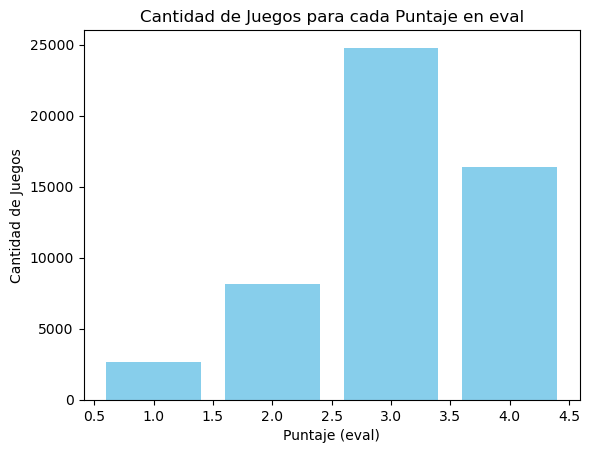

In [467]:
# Calcular la cantidad de juegos para cada puntaje en 'eval'
cantidad_por_eval = df_user_model['eval'].value_counts()

# Crear un gráfico de barras
plt.bar(cantidad_por_eval.index, cantidad_por_eval.values, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Puntaje (eval)')
plt.ylabel('Cantidad de Juegos')
plt.title('Cantidad de Juegos para cada Puntaje en eval')

# Mostrar el gráfico
plt.show()


### **4.5. Guardado de la base final para el modelo**

In [468]:
# Especificar la ruta del archivo Parquet
ruta_archivo_parquet = "bases/df_user_model.parquet"

# Exportar el DataFrame como archivo Parquet
df_user_model.to_parquet(ruta_archivo_parquet, index=False)

# Imprimir mensaje de confirmación
print(f"El DataFrame se ha exportado como archivo Parquet en: {ruta_archivo_parquet}")


El DataFrame se ha exportado como archivo Parquet en: bases/df_user_model.parquet


c:\Users\Legion 5 3060\.conda\envs\SoyHenryProyectconda\lib\site-packages\pyarrow\pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):


comprobamos que está bien

In [469]:
ruta_archivo_parquet = "bases/df_user_model.parquet"
df_user_model_importado = pd.read_parquet(ruta_archivo_parquet)

# Imprimir el DataFrame importado
print(df_user_model_importado)
print(df_user_model_importado.info())


                 user_id  eval                         item_name
0      76561197970982479     3                     Killing Floor
1      76561197970982479     4                        Zeno Clash
2      76561197970982479     3                        Metro 2033
3                js41637     3         Barbie™ Dreamhouse Party™
4                js41637     3            Euro Truck Simulator 2
...                  ...   ...                               ...
51962  76561198312638244     3             Half-Life: Blue Shift
51963  76561198312638244     4                         Half-Life
51964  76561198312638244     3                        Black Mesa
51965        LydiaMorley     3     Counter-Strike Nexon: Zombies
51966        LydiaMorley     4  Counter-Strike: Global Offensive

[51967 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51967 entries, 0 to 51966
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   use